In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

D:\ProgramData\Anaconda3\envs\study_py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\ProgramData\Anaconda3\envs\study_py37\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
D:\ProgramData\Anaconda3\envs\study_py37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
class PCA(object):

    def __init__(self, n_components):

        self.n_components = n_components


    def fit(self, X):

        self.x_mean = np.mean(X, axis=0)
        self.x_std = np.std(X, axis=0)

        X = (X - self.x_mean) / self.x_std  # 其实在 PCA 中是不需要除以方差的，不过有些实现还是会这样做

        m = X.shape[0]

        sigma = np.dot(X.T, X) / m  # 求协方差矩阵

        vals, vecs = np.linalg.eig(sigma)  # 特征值, 特征向量

        self.vals = vals
        self.vecs = vecs

        return self

    def transform(self, X):
        '''数据降维操作'''
        return np.dot(X, self.vecs[:, :self.n_components])

    def recover(self, Z):
        '''将降维的数据，通过映射矩阵重新映射回原来的维度，方便可视化对比降维前后的效果'''

        return np.dot(Z, self.vecs[:, :self.n_components].T)


def display_facedata(X_, title=None):
    m, n = X_.shape
    display_rows = 10
    display_cols = int(m / 10)

    example_hight = int(np.sqrt(n))
    display_face = np.zeros((example_hight * display_rows, example_hight * display_cols))

    temp_m = 0
    for i in range(display_rows):
        for j in range(display_cols):
            display_face[i * example_hight: (i + 1) * example_hight, j * example_hight:(j + 1) * example_hight] = \
                X_[temp_m, :].reshape(example_hight, -1).T
            temp_m += 1

    plt.title(title)
    plt.imshow(display_face)
    plt.show()

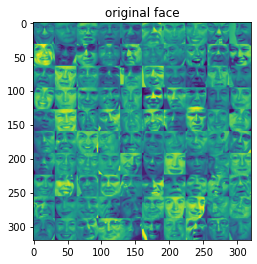

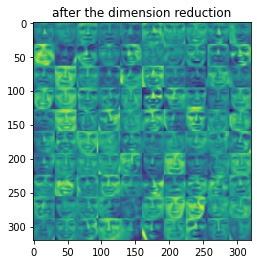

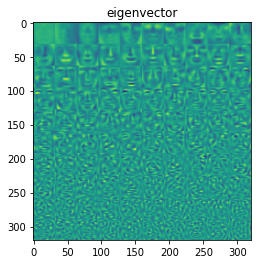

In [3]:
data = scio.loadmat(r'.\data_watermelon\ex7faces.mat')

X_face = data['X']

# 降维前数据可视化
display_facedata(X_face[:100, :], title="original face")

pca = PCA(64)   # 选择降维至 64 维，原维度为 1024

Z_face = pca.fit(X_face).transform(X_face)

Z_revocer = pca.recover(Z_face)

# 降维后的数据可视化
display_facedata(Z_revocer[:100, :], title="after the dimension reduction")

# 前 100 个特征向量可视化
display_facedata(pca.vecs[:, :100].T, title="eigenvector")